### About
Here, we test SIFT + FLANN on the CAM2BEV dataset. As expected, this dataset made it difficult to get the results we expected, so we worked on other datasets after this.

In [4]:
import cv2
import numpy as np

import PIL
import matplotlib.pyplot as plt

In [5]:
image1 = cv2.imread('../data/left.png')
image2 = cv2.imread('../data/front.png')
image3 = cv2.imread('../data/right.png')
image4 = cv2.imread('../data/rear.png')

In [36]:
def plot_grid(images):
    fig, axs = plt.subplots(2, 2)
    for i, ax in enumerate(axs.flat):
        ax.imshow(images[i])
        ax.set_axis_off()
    plt.show()

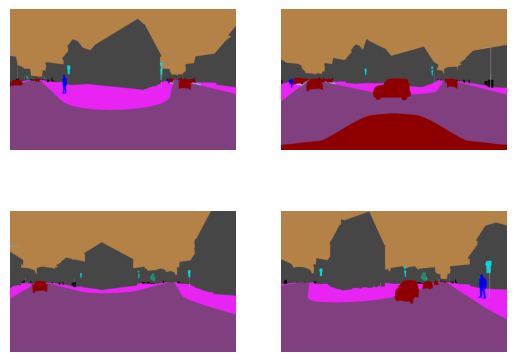

In [37]:
plot_grid([image1, image2, image3, image4])

#### Perspective Warping

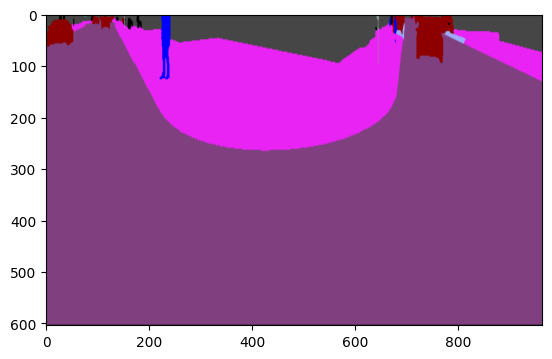

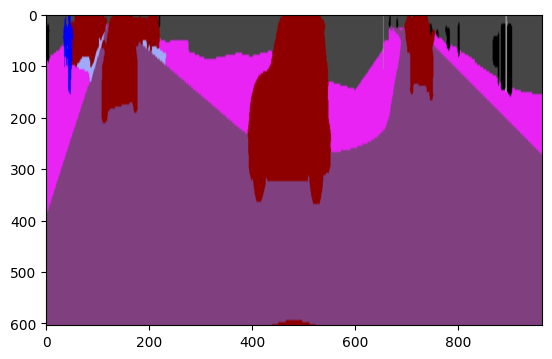

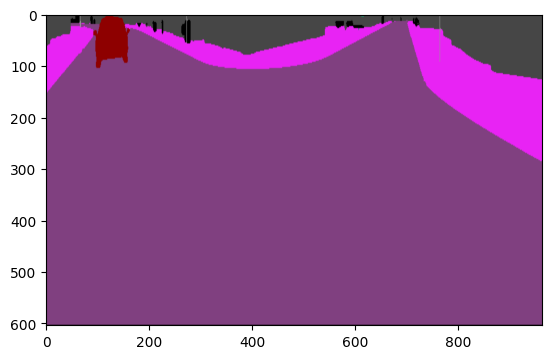

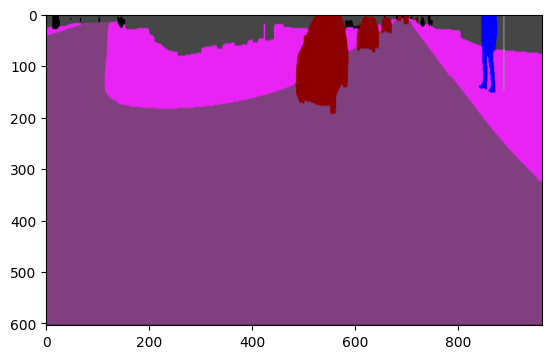

(<matplotlib.image.AxesImage at 0x14b6d6220>, None)

In [6]:
height, width = image1.shape[:2]

src_pts1 = np.array([[0, 300], [width, 300], [0, height], [width, height]], dtype=np.float32)
src_pts2 = np.array([[0, 300], [width, 300], [0, 450], [width, 450]], dtype=np.float32)
src_pts3 = np.array([[0, 300], [width, 300], [0, height], [width, height]], dtype=np.float32)
src_pts4 = np.array([[0, 300], [width, 300], [0, height], [width, height]], dtype=np.float32)

dst_pts = np.array([[0, 0], [width, 0], [0, height], [width, height]], dtype=np.float32)

M1 = cv2.getPerspectiveTransform(src_pts1, dst_pts)
M2 = cv2.getPerspectiveTransform(src_pts2, dst_pts)
M3 = cv2.getPerspectiveTransform(src_pts3, dst_pts)
M4 = cv2.getPerspectiveTransform(src_pts4, dst_pts)

warped_image1 = cv2.warpPerspective(image1, M1, (width, height))
warped_image2 = cv2.warpPerspective(image2, M2, (width, height))
warped_image3 = cv2.warpPerspective(image3, M3, (width, height))
warped_image4 = cv2.warpPerspective(image4, M4, (width, height))

plt.imshow(warped_image1), plt.show()
plt.imshow(warped_image2), plt.show()
plt.imshow(warped_image3), plt.show()
plt.imshow(warped_image4), plt.show()

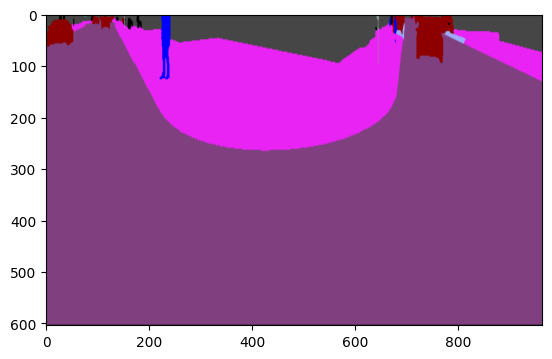

In [19]:
plt.imshow(warped_image1)

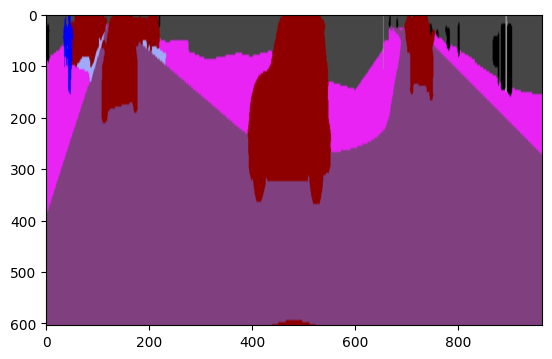

In [20]:
plt.imshow(warped_image2)

#### Location constraints

In [38]:
crop1 = image1[:, 500:]

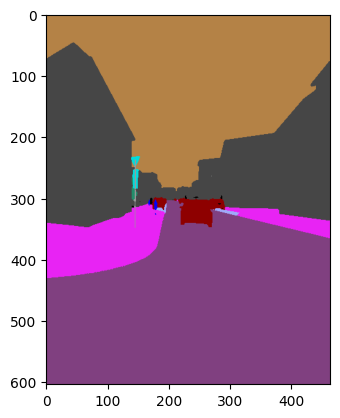

In [39]:
plt.imshow(crop1)

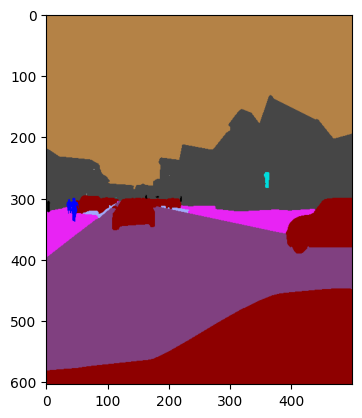

In [40]:
crop2 = image2[:, :500]
plt.imshow(crop2)

In [7]:
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

#### SIFT + FLANN

In [41]:
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(crop1, None)
keypoints2, descriptors2 = sift.detectAndCompute(crop2, None)

In [42]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) # or pass empty dictionary

In [43]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [49]:
matches = flann.match(descriptors1, descriptors2)

In [50]:
matchesMask = [[0,0] for i in range(len(matches))]

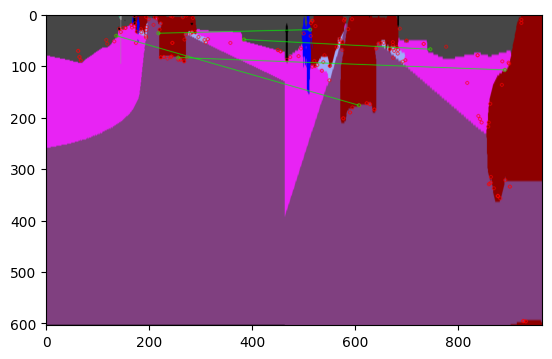

(<matplotlib.image.AxesImage at 0x1400cbe20>, None)

In [32]:
draw_params = dict(matchColor = (0,255,0),
    singlePointColor = (255,0,0),
    matchesMask = matchesMask,
    flags = cv2.DrawMatchesFlags_DEFAULT)

good_matches = []
for m,n in matches:
    if m.distance < 0.6 * n.distance:
        good_matches.append(m)
 
img3 = cv2.drawMatchesKnn(crop1,keypoints1, crop2,keypoints2,matches,None,**draw_params)
 
plt.imshow(img3,),plt.show()

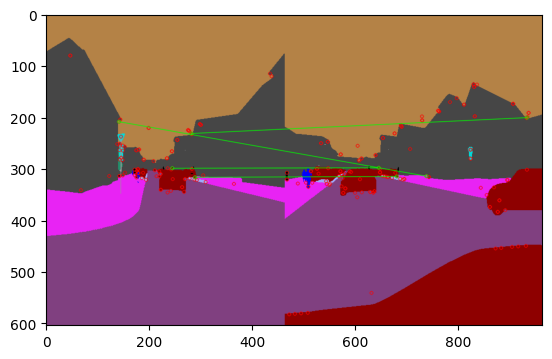

(<matplotlib.image.AxesImage at 0x14b5cd3a0>, None)

In [47]:
draw_params = dict(matchColor = (0,255,0),
    singlePointColor = (255,0,0),
    matchesMask = matchesMask,
    flags = cv2.DrawMatchesFlags_DEFAULT)

good_matches = []
for m,n in matches:
    if m.distance < 0.6 * n.distance:
        good_matches.append(m)
 
img3 = cv2.drawMatchesKnn(crop1,keypoints1, crop2,keypoints2,matches,None,**draw_params)
 
plt.imshow(img3,),plt.show()

#### Perspective Change

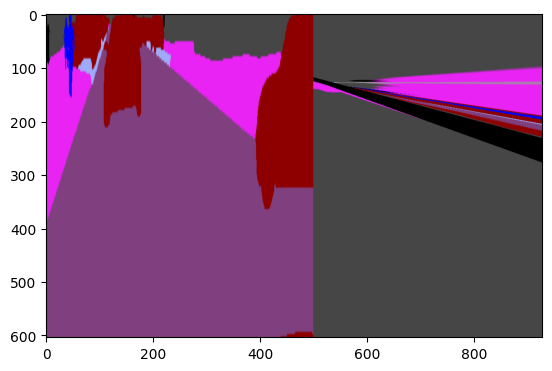

(<matplotlib.image.AxesImage at 0x146bf6cd0>, None)

In [35]:
src_points = np.float32([keypoints1[match.queryIdx].pt for match in good_matches]).reshape(-1, 1, 2)
dst_points = np.float32([keypoints2[match.trainIdx].pt for match in good_matches]).reshape(-1, 1, 2)

M, mask = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)

# Use homography to warp images
h, w, _ = crop1.shape
panorama = cv2.warpPerspective(crop1, M, (w * 2, h))


# Place the second image into the panorama
panorama[0:crop2.shape[0], 0:crop2.shape[1]] = crop2
img4 = panorama

plt.imshow(img4), plt.show()

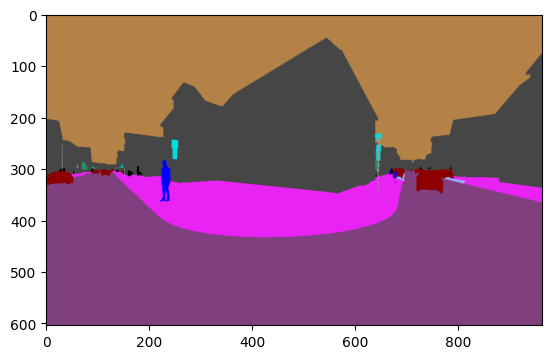

(<matplotlib.image.AxesImage at 0x1400d9b50>, None)

In [16]:
plt.imshow(image1), plt.show()